In [ ]:
# Install Libraries
!pip install vaderSentiment

#https://python.plainenglish.io/twitter-sentiment-analysis-using-vader-tweepy-b2a62fba151e

     |████████████████████████████████| 125 kB 6.8 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
analyser.polarity_scores("I am getting bored in the quarantine.")

{'compound': -0.2732, 'neg': 0.259, 'neu': 0.741, 'pos': 0.0}

In [ ]:
analyser.polarity_scores("This quarantine is completely bored.")
analyser.polarity_scores("This quarantine is exciting.")

{'compound': 0.4939, 'neg': 0.0, 'neu': 0.484, 'pos': 0.516}

In [ ]:
#In Hindi
analyser.polarity_scores("मैं संगरोध में ऊब रहा हूं।")
#In Spanish
analyser.polarity_scores("Estoy aburrido en cuarentena")
#In German
analyser.polarity_scores("Ich bin gelangweilt in Quarantäne")

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

VADER analyses sentiments primarily based on specific key points:
Punctuation
Capitalization
Degree Modifiers
Conjunctions
Preceding Tri-gram

In [ ]:
## Intall Tweepy
!pip install tweepy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import tweepy
import re

In [ ]:
## crear un Objeto de Analisis de Sentimiento
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
##Autentificar Credenciales

consumer_key= '5LBhw9KtXpngJzjmRh948qpIP'
consumer_secret= '79UhTdnWYKjMxl99eetVBqvgY6yScKwRdk0oofkcjsTQr5XkYK'
access_key= '17214392-QDegP6Igu1cyOC8DG6ixQAFlRkQTQzEgDYSH48g96'
access_secret= 'd1G6ZgiWmmixLJOM5ZODCjyKCExMXTAblaCGJDkWmQr8R'

In [ ]:
def initialize():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth, parser = tweepy.parsers.JSONParser())
    return api
api = initialize()

In [ ]:
## Definir las Busquedas a analizar

comp_searches = ("@Google", "@IBM", "@Microsoft", "@Tesla", "@amazon")

In [ ]:
# Realizar Matriz para el Analisis
sentiments = []
# Iterate through all the comp_searches
for search in comp_searches:
       
    # Bring out the 100 tweets
    comp_tweets = api.user_timeline(search, count=100)
    
    # Loop through the 100 tweets
    for tweet in comp_tweets:
        text = tweet["text"]
        
     # Add each value to the appropriate array
        sentiments.append({"User": search,
                           "text":text,
                       "Date": tweet["created_at"] 
                        })

In [ ]:
## Convertir la Matriz and un DataFRame (Marco de datos)
#convert array to dataframe
df = pd.DataFrame.from_dict(sentiments)
df.head(10)

,User,text,Date
0,@Google,"@Kumar53104978 Hi, Kumar. The call recording d...",Sun Oct 17 10:31:56 +0000 2021
1,@Google,@diorrjjun Hi there. Let's try resetting the a...,Sun Oct 17 02:00:20 +0000 2021
2,@Google,@skituate Thanks. Appreciate you taking the ti...,Sun Oct 17 01:47:10 +0000 2021
3,@Google,"@shrikantballal Hi, Shrikant. Have you tried t...",Sat Oct 16 18:00:42 +0000 2021
4,@Google,@heavens_007 Thanks for following. Would you m...,Sat Oct 16 17:40:10 +0000 2021
5,@Google,"@heavens_007 Hi again, Hemant. Just to check, ...",Sat Oct 16 16:50:06 +0000 2021
6,@Google,"@heavens_007 Hi, Hemant. We'd like to provide ...",Sat Oct 16 01:08:37 +0000 2021
7,@Google,"@diorrjjun Hi, Jae. Are you having trouble usi...",Sat Oct 16 01:07:43 +0000 2021
8,@Google,"""Design that provides a range of ways to inter...",Fri Oct 15 21:00:25 +0000 2021
9,@Google,RT @GoogleSmallBiz: This year we’re again part...,Fri Oct 15 20:11:18 +0000 2021


In [ ]:
## Para ver los tweets de un usuario específico

df_tesla = df[ df['User'] == '@Tesla']
df_tesla.head()

,User,text,Date
300,@Tesla,First deliveries of new Model X https://t.co/W...,Sun Oct 17 13:37:44 +0000 2021
301,@Tesla,Safety will continue to improve via over-the-a...,Wed Oct 13 19:18:30 +0000 2021
302,@Tesla,Giga Berlin-Brandenburg County Fair https://t....,Sat Oct 09 19:39:56 +0000 2021
303,@Tesla,RT @elonmusk: Please consider joining Tesla AI...,Fri Oct 08 10:34:54 +0000 2021
304,@Tesla,Tesla Shareholder Meeting https://t.co/uEv7dE43dC,Thu Oct 07 21:44:55 +0000 2021


In [ ]:
## Limpiando la data (quitar urls, numeros, user ids, etc) para analizar tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [ ]:
## Matriz limpia de tweets
df['text'] = clean_tweets(df['text'])
df['text'].head()

0     Hi, Kumar. The call recording disclosure is i...
1     Hi there. Let's try resetting the app data. M...
2     Thanks. Appreciate you taking the time to sha...
3     Hi, Shrikant. Have you tried the steps here t...
4     Thanks for following. Would you mind sharing ...
Name: text, dtype: object

In [ ]:
## Encontrando las puntuaciones de los tweets
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['text'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['text'][i])["compound"]
    pos = analyzer.polarity_scores(df['text'][i])["pos"]
    neu = analyzer.polarity_scores(df['text'][i])["neu"]
    neg = analyzer.polarity_scores(df['text'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
## Convertir los valores en un Marco de Datos (dataframe)
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

,User,text,Date,Compound,Positive,Negative,Neutral
0,@Google,"Hi, Kumar. The call recording disclosure is i...",Sun Oct 17 10:31:56 +0000 2021,0.5994,0.234,0.0,0.766
1,@Google,Hi there. Let's try resetting the app data. M...,Sun Oct 17 02:00:20 +0000 2021,0.3818,0.140,0.0,0.860
2,@Google,Thanks. Appreciate you taking the time to sha...,Sun Oct 17 01:47:10 +0000 2021,0.9153,0.421,0.0,0.579
3,@Google,"Hi, Shrikant. Have you tried the steps here t...",Sat Oct 16 18:00:42 +0000 2021,0.0000,0.000,0.0,1.000
4,@Google,Thanks for following. Would you mind sharing ...,Sat Oct 16 17:40:10 +0000 2021,0.7184,0.304,0.0,0.696


In [ ]:
## Colectar los Hasthags Positivos
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['text'][df['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

['WorldFoodDay',
 'DayOfTheGirl',
 'MSIgnite',
 'model3',
 'flex',
 'roadtrip',
 'deliveringsmiles',
 'momtotherescue',
 'sourcreambelongsinchili',
 'withcinnamonrolls']

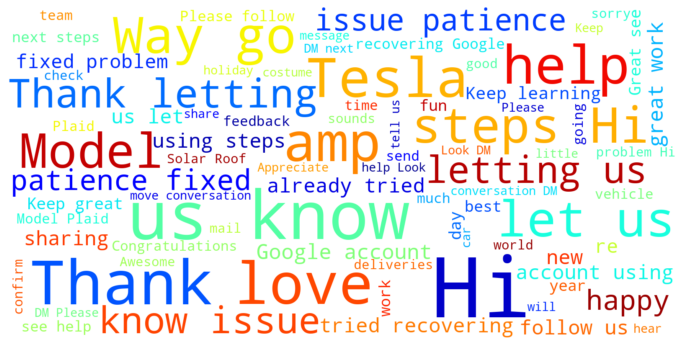

In [ ]:
## Graficar Conteo de Palabras

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(df['text'])

In [ ]:
## Pivot Table para ver la puntuación de Sentimientos por Organizacion
score_table = df.pivot_table(index='User',  values="Compound", aggfunc = np.mean)
score_table

,Compound
User,
@Google,0.259139
@IBM,0.485832
@Microsoft,0.246180
@Tesla,0.154986
@amazon,0.677930


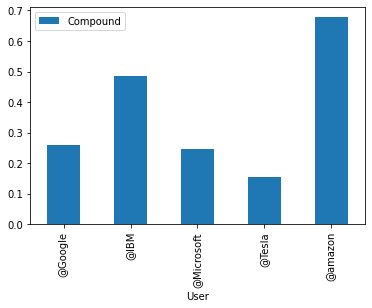

In [ ]:
#Visualización Cantidad total de Tweets
score_table.plot(kind='bar')


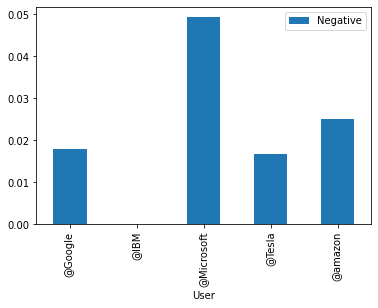

In [ ]:
## Visualizando quien posteo Mayor cantidad de Tweets Negativos
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='User',  values="Negative", aggfunc = np.mean)
neg_score_table

neg_score_table.plot(kind='bar')